To run this notebook, the following Python modules are required:

* numpy
* xarray
* matplotlib
* cartopy
* cmaps

`cmaps` enables you to use the plentiful colormaps from [NCL](https://www.ncl.ucar.edu/Document/Graphics/color_table_gallery.shtml).

# Read in the data

In [1]:
import xarray as xr
import numpy as np

# get xarray dataset
data_path = "../dataset/sst.mon.mean.nc"
with xr.open_dataset(data_path) as ds:
    # get xarray dataarray
    da = ds.sst
    lat = ds.lat
    lon = ds.lon
# select the data from 2000 to 2021
da = da.sel(time=slice("2000", "2021"))
print("Selected data: ", da)
# average over time dimension
da = da.mean(dim="time")
# convert to numpy array
data = da.values
lat = lat.values
lon = lon.values
print("Shape of data: ", data.shape)
# slightly shift the last lon,
# ref: https://stackoverflow.com/questions/56412206/cant-show-0-tick-in-right-when-central-longitude-180
# lon[-1] = 360 - 1e-10
# get min and max values, ignore nan values
print("min value: ", np.nanmin(data))
print("max value: ", np.nanmax(data))
print("min lat: ", np.min(lat))
print("max lat: ", np.max(lat))
print("min lon: ", np.min(lon))
print("max lon: ", np.max(lon))

Selected data:  <xarray.DataArray 'sst' (time: 264, lat: 180, lon: 360)>
[17107200 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 2000-01-01 2000-02-01 ... 2021-12-01
Attributes:
    long_name:     Monthly Means of Global Sea Surface Temperature
    valid_range:   [-5. 40.]
    units:         degC
    var_desc:      Sea Surface Temperature
    dataset:       COBE Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Individual obs
    actual_range:  [-1.7999996 34.87     ]
Shape of data:  (180, 360)
min value:  -1.7999955
max value:  29.954485
min lat:  -89.5
max lat:  89.5
min lon:  0.5
max lon:  359.5


# plot the data

In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cmaps
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cmap=cmaps.MPL_jet

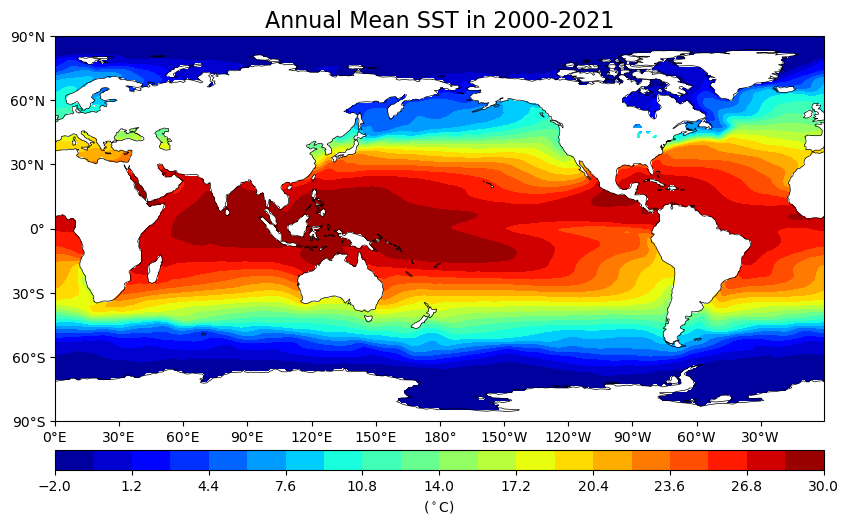

In [3]:
# set projection
projection = ccrs.PlateCarree(central_longitude=180) # central_longitude=180
# set figure size
fig, ax = plt.subplots(1, 1, figsize=(10, 5), 
            subplot_kw={'projection': projection})
# set title
ax.set_title("Annual Mean SST in 2000-2021", fontsize=16)
# set levels
levels = np.linspace(-2, 30, 21) # 0-100, 21 levels
# plot contourf
cs = ax.contourf(lon, lat, data, levels=levels, cmap=cmap, transform=ccrs.PlateCarree())
# set lat and lon ticks
# ax.set_xticks(np.append(np.arange(0, 360, 30), lon[-1]), crs=ccrs.PlateCarree())
ax.set_xticks(np.arange(0, 360, 30), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# add coastlines
ax.coastlines(resolution='110m', color='black', linewidth=0.5)
# add colorbar below the plot
axins = inset_axes(ax, width="100%", height="5%", loc='lower center', borderpad=-3.5)
fig.colorbar(cs, cax=axins, orientation='horizontal', ticks=levels[::2], label='($^\circ$C)')
# save figure and show it
# plt.savefig("2000-2021_annual_mean_sst.png", dpi=300, bbox_inches='tight')
plt.show()